# Menguji Hipotesis Dari A/B Testing

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pendahuluan](#intro)
* [Tahap 2. Import Library](#library_import)
* [Tahap 3. Import Dataset](#observation)
* [Tahap 4. Observasi Data](#observation)
    * [4.1 Tabel Hypothesis](#hypothesis)
    * [4.2 Tabel Orders](#orders)
    * [4.3 Tabel Visits](#visits)
* [Tahap 5. Memprioritaskan Hipotesis](#hypothesis)
* [Tahap 6. Analisis A/B Testing](#testing)
    * [6.1 Pendapatan Kumulatif Berdasarkan Kelompok](#avgcum)
    * [6.2 Ukuran Pesanan Rata-Rata Kumulatif Berdasarkan Kelompok](#avgorder)
    * [6.3 Perbedaan Relatif Untuk Ukuran Pesanan Rata-Rata Kumulatif Kelompok B Dibandingkan Dengan A](#avgordersize)
    * [6.4 Tingkat Konversi Setiap Kelompok Sebagai Rasio Pesanan Terhadap Jumlah Kunjungan Setiap Hari](#conversion)
    * [6.5 Scatter Chart Untuk Jumlah Pesanan Per Pengguna](#orderuser)
    * [6.6 Persentil ke-95 dan ke-99 Untuk Jumlah Pesanan Per Pengguna](#percentiluser)
    * [6.7 Scatter Chart Untuk Harga Pesanan](#orderprice)
    * [6.8 Persentil ke-95 dan ke-99 Untuk Harga Pesanan](#percentilprice)
    * [6.9 Signifikansi Statistik Perbedaan Konversi Antar Kelompok Menggunakan Data Mentah](#conversiongroup)
    * [6.10 Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Menggunakan Data Mentah](#avgordersize)
    * [6.11 Signifikansi Statistik Perbedaan Konversi Antar Kelompok Menggunakan Data Yang Telah Difilter](#conversiongroupfilter)
    * [6.12 Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Menggunakan Data Yang Telah Difilter](#sizeordergroup)
* [Kesimpulan](#end)

## Pendahuluan <a id='intro'></a>
Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. Anda perlu memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya.

[Kembali ke Daftar Isi](#back)

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Observasi Data

### Tabel Hypothesis

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypotheses.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object

In [5]:
hypotheses.shape

(9, 5)

In [6]:
hypotheses.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

### Tabel Orders

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
orders.dtypes

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object

In [9]:
orders.shape

(1197, 5)

In [10]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

### Tabel Visits

In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
orders.dtypes

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object

In [13]:
orders.shape

(1197, 5)

In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
hypotheses.columns = hypotheses.columns.str.lower()

In [16]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [17]:
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [18]:
orders = orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})

In [19]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [20]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Kesimpulan:
- Ketiga dataset tidak memiliki nilai null pada kolomnya
- Type data untuk kolom date pada tabel orders dan visit tidak dalam bentuk datetime, sehingga diubah dahulu ke dalam type datetime
- Nama kolom pada tabel hypotheses menggunakan huruf kapital di awalannya, sehingga diubah ke dalam bentuk lower case, serta memperbaiki penamaan kolom pada tabel orders

## Memprioritaskan Hipotesis

In [21]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [22]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [23]:
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)
hypotheses_ice

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [24]:
hypotheses['hypothesis'][8]

'Launch a promotion that gives users discounts on their birthdays'

In [25]:
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)
hypotheses_rice

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [26]:
hypotheses['hypothesis'][7]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

Kesimpulan:
- Jika kita menggunakan metode ICE dalam prioritas hipotesis, maka akan didapatkan hipotesis 'Launch a promotion that gives users discounts on their birthdays' dengan skor ICE sebesar 16.20.
- Dengan menggunakan metode RICE dalam prioritas hipotesis, maka akan didapatkan hipotesis 'Add a subscription form to all the main pages. This will help you compile a mailing list' dengan skor RICE sebesar 112.0.

## Analisis A/B Testing

### Pendapatan Kumulatif Berdasarkan Kelompok

In [27]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [28]:
orders_agg = orders.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transaction_id': 'nunique',
    'visitor_id': 'nunique'
}).reset_index()

In [29]:
orders_agg

,date,group,revenue,transaction_id,visitor_id
0,2019-08-01,A,2356.8,24,20
1,2019-08-01,B,1620.0,21,20
2,2019-08-02,A,1503.5,20,19
3,2019-08-02,B,2623.8,24,23
4,2019-08-03,A,1815.2,24,24
...,...,...,...,...,...
57,2019-08-29,B,3623.7,20,20
58,2019-08-30,A,1364.3,11,10
59,2019-08-30,B,3393.3,24,24
60,2019-08-31,A,991.4,12,12


In [30]:
data_merge = pd.merge(orders_agg, visits)

data_merge_a = data_merge[data_merge['group'] == 'A']
data_merge_b = data_merge[data_merge['group'] == 'B']

In [31]:
for data in (data_merge_a, data_merge_b):
    data['revenue_cumsum'] = data['revenue'].cumsum()
    data['transaction_id_cumsum'] = data['transaction_id'].cumsum()
    data['visitor_id_cumsum'] = data['visitor_id'].cumsum()
    data['visits_cumsum'] = data['visits'].cumsum()

In [32]:
data_cumulative = pd.concat([data_merge_a, data_merge_b]).sort_values(by='date')

In [33]:
data_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


<AxesSubplot:xlabel='date', ylabel='revenue_cumsum'>

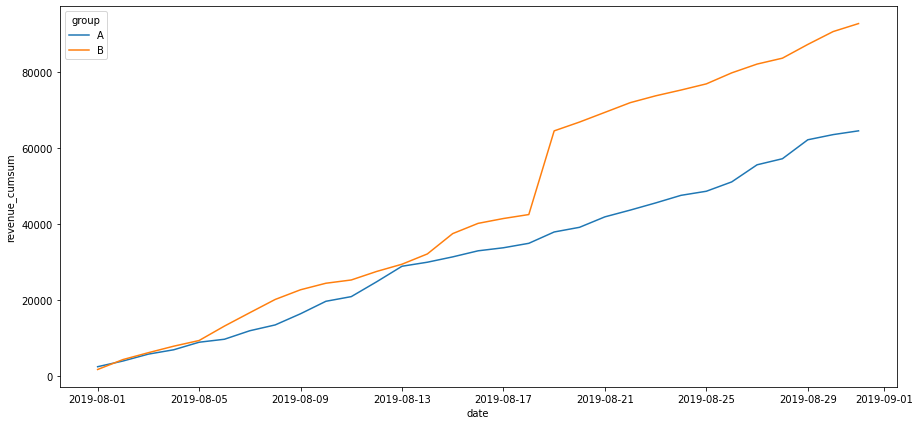

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data_cumulative, x='date', y='revenue_cumsum', hue='group')

Kesimpulan

Dari grafik dapat terlihat pada awal dimulainya testing, gruop A dan B tidak memiliki perbedaan yang jauh dari nilai revenue. Seiring dengan berjalannya waktu, group B memiliki nilai revenue yang lebih besar daripada gruop A, dari grafik yang ditampilkan bisa dilihat perbedaan yang signifikan menjelang akhir dari periode testing dimana group B nilai revenue kumulatifnya lebih dari 80000.

### Pesanan Rata-Rata Kumulatif Berdasarkan Kelompok

In [35]:
data_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


In [36]:
data_cumulative['orders_size_cumsum'] = data_cumulative['revenue_cumsum'] / data_cumulative['transaction_id_cumsum']

<AxesSubplot:xlabel='date', ylabel='orders_size_cumsum'>

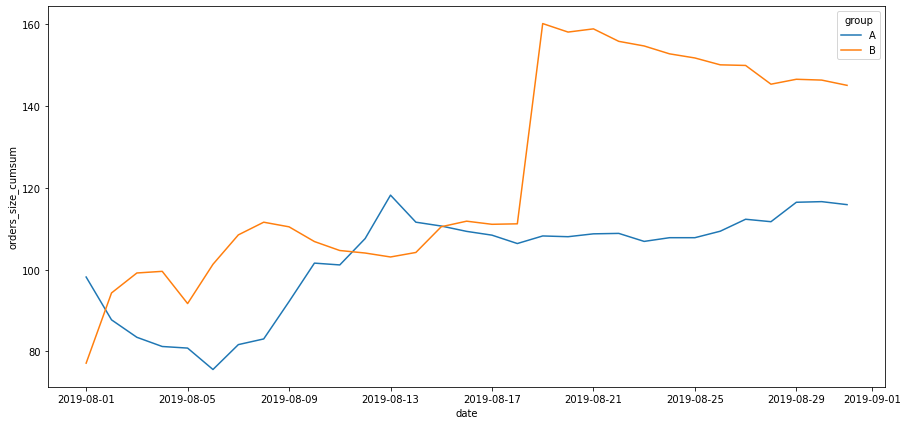

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data_cumulative, x='date', y='orders_size_cumsum', hue='group')

Kesimpulan

Dari sisi jumlah pesanan rata-rata kumulatif berdasarkan kelompok, pada awal periode testing, group B memiliki jumlah pesanan rata-rata dibawah dari group A, tetapi seiring dengan berjalannya waktu, group B dapat mengungguli group A dari sisi jumlah pesanan rata-rata. Hal ini juga seiring dengan grafik sebelumnya yang menyaakan bahwa group B pun memiliki nilai revenue yang lebih tinggi dari group A. 

### Perbedaan Relatif Untuk Ukuran Pesanan Rata-Rata Kumulatif Kelompok B Dibandingkan Dengan A

In [38]:
data_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,orders_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [39]:
data_cumulative_a = data_cumulative[data_cumulative['group'] == 'A'].reset_index(drop=True)
data_cumulative_b = data_cumulative[data_cumulative['group'] == 'B'].reset_index(drop=True)

In [40]:
merged_data = data_cumulative_a.merge(data_cumulative_b,
                                     left_on='date',
                                     right_on='date',
                                     how='left',
                                     suffixes=['A', 'B'])

In [41]:
merged_data.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,...,groupB,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,orders_size_cumsumB
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,...,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,...,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,...,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,...,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,...,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881


In [42]:
merged_data['relative_order_size'] = merged_data['orders_size_cumsumB'] / merged_data['orders_size_cumsumA'] - 1

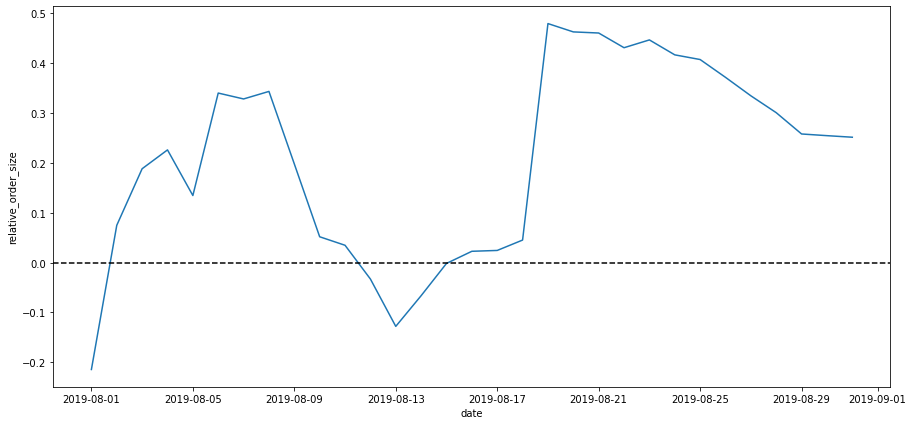

In [43]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=merged_data, x='date', y='relative_order_size')
plt.axhline(y=0, color='black', linestyle='--')

Kesimpulan

Dari grafik perbedaan relatif jika group A dibandingkan dengan group B, terlihat ada beberapa waktu saat grafik itu dibawah nilai 0. Pada saat nilai positif, menandakan bahwa group B mengungguli group A dari sisi pesanan rata-rata, sedangkan, jika grafik dibawah nilai 0 maka pesanan rata-rata group A saat itu mengungguli grup B.

### Tingkat Konversi Setiap Kelompok Sebagai Rasio Pesanan Terhadap Jumlah Kunjungan Setiap Hari

In [44]:
data_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,orders_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235
...,...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547,116.477903
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198,146.348871
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037,116.630275
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736,115.897487


In [45]:
data_cumulative['conversion_cumsum'] = data_cumulative['transaction_id_cumsum'] / data_cumulative['visits_cumsum']

<AxesSubplot:xlabel='date', ylabel='conversion_cumsum'>

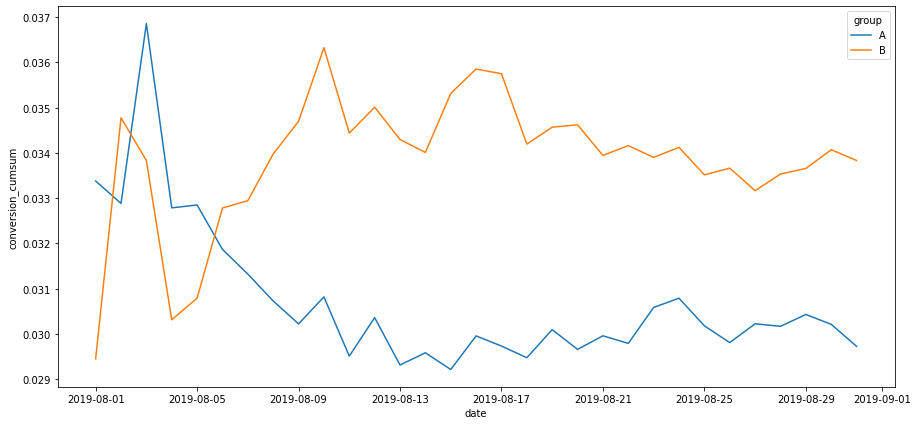

In [46]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=data_cumulative, x='date', y='conversion_cumsum', hue='group')

Kesimpulan

Dari hasil konversion pun, group B mengungguli grup A pada akhit periode testing, sempat tertinggal di awal periode testing dari group A, tapi group B meningkat seiring dengan berjalannya waktu.

### Scatter Chart Untuk Jumlah Pesanan Per Pengguna

In [47]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [48]:
visitor_agg = orders.groupby(['visitor_id']).agg({
    'transaction_id': 'nunique'
}).reset_index()

In [49]:
visitor_agg = visitor_agg.reset_index()

In [50]:
visitor_agg

,index,visitor_id,transaction_id
0,0,5114589,1
1,1,6958315,1
2,2,8300375,2
3,3,11685486,1
4,4,39475350,1
...,...,...,...
1026,1026,4266935830,2
1027,1027,4278982564,1
1028,1028,4279090005,1
1029,1029,4281247801,1


<AxesSubplot:xlabel='index', ylabel='transaction_id'>

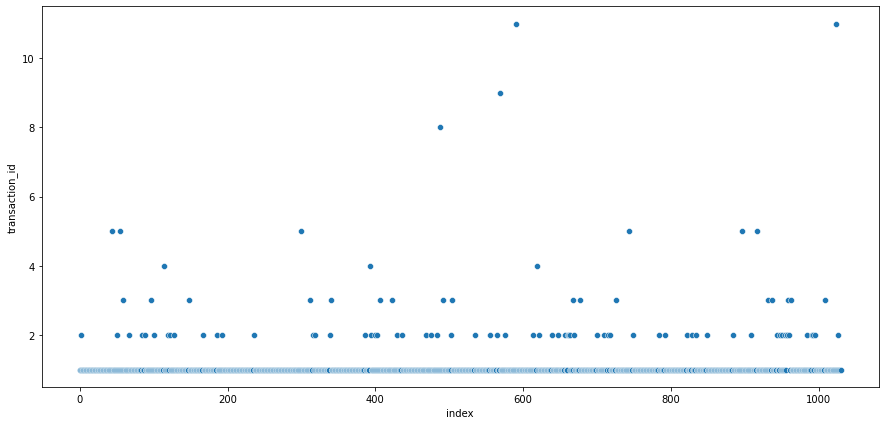

In [51]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=visitor_agg, x='index', y='transaction_id')

Kesimpulan

Dari grafik scatter plot tersebut, kita dapat melihat bahwa banyak pengguna yang melakukan pesanan sebanyak 2 kali dan ada yang mencapai 11 kali walau hanya beberapa pengguna.

### Persentil ke-95 dan ke-99 Untuk Jumlah Pesanan Per Pengguna

In [52]:
np.percentile(visitor_agg['transaction_id'], [95, 99])

array([2., 4.])

Kesimpulan

Jika dilakukan percentile ke 95 dan 99, didapatkan nilai 2 dan 4 dimana memang banyak pengguna yang melakukan pembelian sebanyak 2 kali dan sisanya berada diatas angka 2.

### Scatter Chart Untuk Harga Pesanan

In [53]:
orders = orders.reset_index()

<AxesSubplot:xlabel='index', ylabel='revenue'>

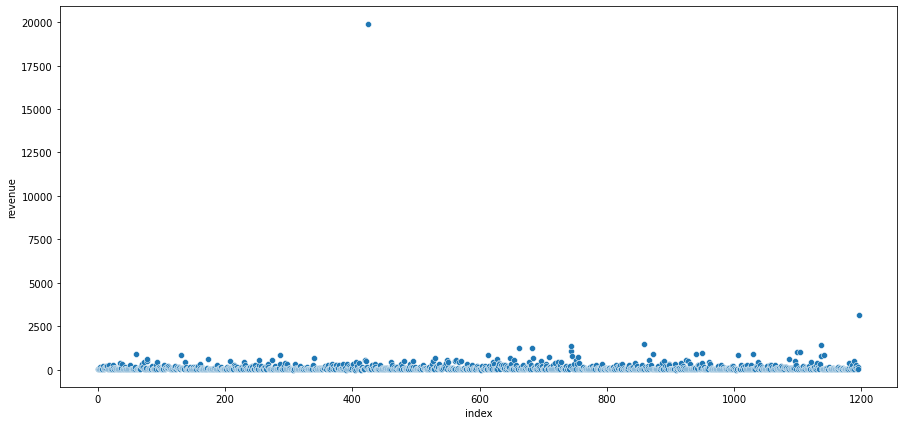

In [54]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=orders, x='index', y='revenue')

(0.0, 1210.0, 0.0, 1500.0)

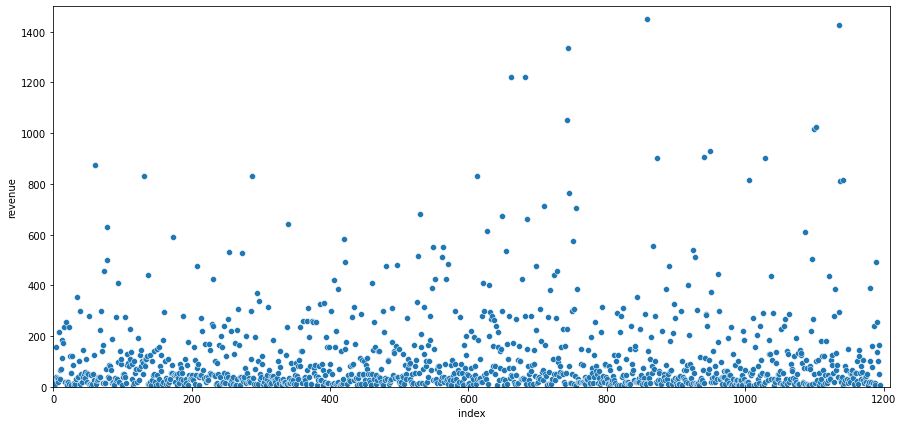

In [55]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=orders, x='index', y='revenue')
plt.axis([0, 1210, 0, 1500])

Kesimpulan

Dari scatter plot dapat dsimpulkan bahwa rata-rata harga pesanan yang terbanyak ada di range 0 - 200, dimana terlihat distribusi plot pada range tersebut sangatlah banyak.

### Persentil ke-95 dan ke-99 Untuk Harga Pesanan.

In [56]:
np.percentile(orders['revenue'], [50, 75, 95, 99])

array([ 50.2  , 130.4  , 435.54 , 900.904])

Kesimpulan

Dari persentil ke 50, 75, 95, dan 99 pada nilai revenue, didapatkan nilai 50.2  , 130.4  , 435.54 , 900.904. Nilai 50.2 adalah 50% atau bisa daibilang nilai tengah dan sisanya adalah persentil di atasnya.

### Signifikansi Statistik Perbedaan Konversi Antar Kelompok Menggunakan Data Mentah

In [57]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [58]:
orders_a = orders[orders['group'] == 'A'].groupby('visitor_id').agg({
    'transaction_id': 'nunique'
}).reset_index()

orders_b = orders[orders['group'] == 'B'].groupby('visitor_id').agg({
    'transaction_id': 'nunique'
}).reset_index()

In [59]:
orders_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [60]:
orders_b

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [61]:
orders_a['transaction_id']

0      1
1      1
2      1
3      1
4      1
      ..
498    1
499    7
500    1
501    1
502    1
Name: transaction_id, Length: 503, dtype: int64

In [62]:
visits[visits['group'] == 'A']['visits'].sum()

18736

In [63]:
visits[visits['group'] == 'A']['visits'].sum() - len(orders_a['transaction_id'])

18233

In [64]:
sample_a = pd.concat([orders_a['transaction_id'],
            pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_a['transaction_id'])),
                     name='orders')],
            axis=0)

sample_b = pd.concat([orders_a['transaction_id'],
            pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_a['transaction_id'])),
                     name='orders')],
            axis=0)

In [65]:
sample_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
dtype: int64

In [66]:
len(sample_a), len(sample_b)

(18736, 18916)

- H0 = Tidak ada perbedaan data A dan B
- H1 = Terdapat perbedaan secara statistik

In [67]:
alpha = 0.05

results = st.mannwhitneyu(sample_a, sample_b)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Hipotesis nol ditolak: Perbedaannya secara statistik data a dan b')
else:
    print('Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya')

p-value:  0.8778530458242377
Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya


Kesimpulan

Dari hasil pengujian statistik didapatkan nilai p-value sebesar 0.8778530458242377 yang mana menolak hipotesis 0.

### Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Menggunakan Data Mentah

In [68]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [69]:
sample_rev_a = orders[orders['group'] == 'A']['revenue'] 
sample_rev_b = orders[orders['group'] == 'B']['revenue']

- H0 = Tidak ada perbedaan data A dan B
- H1 = Terdapat perbedaan secara statistik

In [70]:
alpha = 0.05

results = st.mannwhitneyu(sample_rev_a, sample_rev_b)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Hipotesis nol ditolak: Perbedaannya secara statistik data a dan b')
else:
    print('Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya')

p-value:  0.6915246773264736
Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya


Kesimpulan

Dari hasil pengujian statistik didapatkan nilai p-value sebesar 0.6915246773264736 yang mana kita menerima hipotesis 0, kita tidak bisa menyimpulkan perbedaannya.

### Signifikansi Statistik Perbedaan Konversi Antar Kelompok Menggunakan Data Yang Telah Difilter

In [71]:
orders_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [72]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [73]:
users_with_many_orders = pd.concat([orders_a[orders_a['transaction_id'] > 2]['visitor_id'],
                                    orders_b[orders_b['transaction_id'] > 2]['visitor_id']], axis=0)

users_with_expensive_orders = orders[orders['revenue'] > 430]['visitor_id']

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

In [74]:
users_with_expensive_orders

60      4256040402
73      2947100995
77       787824685
78      3288820196
131     2254586615
           ...    
1136    1307669133
1137     759473111
1142    2606908679
1189     393266494
1196    2108080724
Name: visitor_id, Length: 61, dtype: int64

In [75]:
users_with_many_orders

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitor_id, dtype: int64

In [76]:
sample_user_a = pd.concat([orders_a[~(orders_a['visitor_id'].isin(abnormal_users))]['transaction_id'],
                pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_a['transaction_id'])),
                         name='orders')],
                axis=0)

sample_user_b = pd.concat([orders_b[~(orders_b['visitor_id'].isin(abnormal_users))]['transaction_id'],
                pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_b['transaction_id'])),
                         name='orders')],
                axis=0)

- H0 = Tidak ada perbedaan data A dan B
- H1 = Terdapat perbedaan secara statistik

In [77]:
alpha = 0.05

results = st.mannwhitneyu(sample_user_a, sample_user_b)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Hipotesis nol ditolak: Perbedaannya secara statistik data a dan b')
else:
    print('Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya')

p-value:  0.01417823754717904
Hipotesis nol ditolak: Perbedaannya secara statistik data a dan b


Kesimpulan

Pengujian statistik memunculkan p-value 0.01417823754717904, yang mana berarti Hipotesis ol ditolak: Perbedaannya secara statistik data a dan b.

### Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Menggunakan Data Yang Telah Difilter

In [78]:
sample_avg_a = orders[(orders['group'] == 'A') & ~(orders_a['visitor_id'].isin(abnormal_users))]['revenue']
sample_avg_b = orders[(orders['group'] == 'B') & (orders_a['visitor_id'].isin(abnormal_users))]['revenue']

- H0 = Tidak ada perbedaan data A dan B
- H1 = Terdapat perbedaan secara statistik

In [79]:
alpha = 0.05

results = st.mannwhitneyu(sample_avg_a, sample_avg_b)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Hipotesis nol ditolak: Perbedaannya secara statistik data a dan b')
else:
    print('Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya')

p-value:  0.6257063151882403
Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya


Kesimpulan

Dari hasil pengujian statistik didpat p-value 0.6257063151882403, yang mana artinya Gagal menolak hipotesis nol: Kita tidak bisa menyipulkan perbedaannya.

## Kesimpulan

Dari hasil analisa yang didapat, secaras keseluruhan group B jauh mengungguli dari beberapa perhitungan yang dilakukan. Memang sempat teringgal pada awal periode, tetapi grafik dari group B meningkat seiring dengan berjalannya waktu. Hingga di akhir periode, group B jauh berada di atas group A. Dari pengujian statistik, 3 dari 4 parameter menunjukkan nilai yang sama dan hanya 1 yang membedakan. Maka dari itu, disarankan untuk menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok atau menggunakan data dari group B karena jika dilihat dari grafik group B memiliki laju yang sangat baik pada 